# Names of the most frequent Genes/Pathways
###### N-> even if the other plots are idps-idps, retina-idps. For these type of plots just one: idpsretina-idpsretina

In [1]:
import sys, os
import logging
os.chdir('..')
current_dir = os.getcwd()

from settings import PYTHON_LOGGING_LEVEL, DIR_UTILS, FILE_GENETIC_INFO, DATE_USED, N_NAMES_SHOWN

logger = logging.getLogger(__name__)
logging.basicConfig(level=PYTHON_LOGGING_LEVEL)

sys.path.append(DIR_UTILS)

N_NAMES_SHOWN = int(N_NAMES_SHOWN)

from utils.preprocessing_genet.previous_sumstats import (get_genetic_names, complete_genes_path,
                                                        doble_num_shared_genes)

from utils.data_information.data_genetics_info import list_names
from utils.data_information.data_retina_info import list_retina_homologous_red, list_retina_homologous_red_new


In [2]:
## pheno_info_file is a csv to filter the relevant IDPs
pheno_info_file = f'{DIR_UTILS}utils/data_information/{FILE_GENETIC_INFO}'
traits_all, traits_all_new = get_genetic_names(pheno_info_file)

all_names = traits_all + list_retina_homologous_red
all_names_new = traits_all_new + list_retina_homologous_red_new

Gene/Path: gen
 


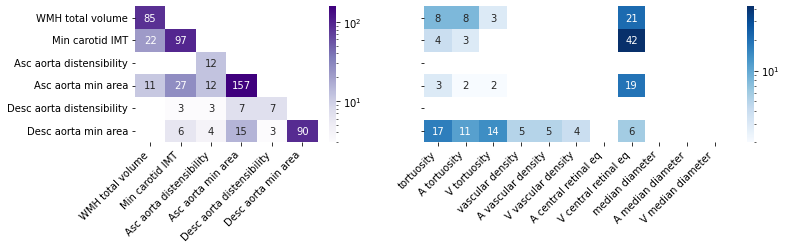

Gene/Path: pathway
 


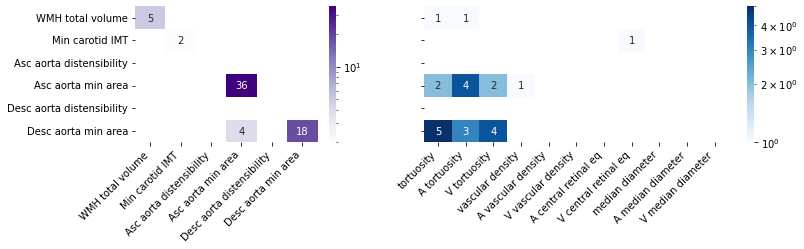

In [3]:
l_gen_path = ["gen", "pathway"]  #'gen' or 'pathway'
#gen_path = 'gen' #'gen' or 'pathway'

for gen_path in l_gen_path:
    print(f"Gene/Path: {gen_path}\n ")
    df_shared_elements_names, df_file_form_2 = complete_genes_path(
        gen_path,
        list_retina_homologous_red,
        list_retina_homologous_red_new,
        list_names,
        traits_all,
        traits_all_new,
    )

    ### Figures:
    # fig1_name = f'{DATE_USED}_num_shared_{gen_path}.jpg'
    # plot_num_shared_genes(df_file_form_2, val_conversion_factor=2, val_conversion_factor_extra=1, name_fig =fig1_name, only_half=False)
    # fig2_name = f'{DATE_USED}_top_shared_{gen_path}.jpg'
    # plot_top_elements_frequency(df_shared_elements_names, val_conversion_factor=2, val_conversion_factor_extra=1, name_fig=fig2_name, only_half=False)

    # df_squared_IDPs = df_file_form_2[traits_all_new] #[list(traits_all)]
    df_squared_IDPs = df_file_form_2.loc[traits_all_new, traits_all_new]
    df_shared_elements_names_squared = df_shared_elements_names.loc[
        traits_all, traits_all
    ]

    df_rectangular_IDPs = df_file_form_2.loc[
        list_retina_homologous_red_new, traits_all_new
    ]
    df_shared_elements_names_rectangular = df_shared_elements_names.loc[
        traits_all, list_retina_homologous_red
    ]

    ##### SUBPLOT:
    # title_square = f'{DATE_USED}_{gen_path}_IDPs_IDPs'
    # f_.plot_num_shared_genes(df_squared_IDPs, label_name=f'N {gen_path} in common', val_conversion_factor=2, val_conversion_factor_extra=0.75, title_fig=title_square, only_half=True)
    # f_.plot_top_elements_frequency(df_shared_elements_names_squared, 20)

    ##### SUBPLOT:
    # title_square = f'{DATE_USED}_{gen_path}_IDPs_retina'
    # f_.plot_num_shared_genes(df_rectangular_IDPs, label_name=f'N {gen_path} in common', val_conversion_factor=2, val_conversion_factor_extra=0.75, title_fig=title_square, only_half=False)
    # f_.plot_top_elements_frequency(df_shared_elements_names_rectangular, 20)

    title_both = f"{DATE_USED}_{gen_path}_IDPs_IDPs_IDPs_retina.jpg"
    # cte= 1.5
    doble_num_shared_genes(
        df_corr1=df_squared_IDPs,
        df_corr2=df_rectangular_IDPs.T,
        figsize_val=(12, 2.5), #(14, 4),  # (12,4)-> does not work well (13*cte, 4*cte),
        width_ratios_val=[0.6,1],#[1, 1],
        title_fig=title_both,
        only_half1=True,
        only_half2=False,
        cmap_used1="Purples",
        cmap_used2="Blues",
    )
